# Bivariate Normal Distribution

A visual and computational exploration of the **bivariate normal (Gaussian) distribution** — the joint distribution of two correlated normal random variables.

![Bivariate normal density](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/400px-MultivariateNormal.png)

*Multivariate normal density (Wikipedia). Our bivariate case is the 2D slice.*

---

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Shared plot style (DRY)
FIG_SIZE_2D = (10, 8)
FIG_SIZE_3D = (12, 10)
CMAP = 'viridis'

## 1. Parameters & covariance matrix

We define the distribution by a **mean vector** \(\boldsymbol{\mu}\) and **covariance matrix** \(\Sigma\). The correlation \(\rho\) controls the dependence between \(X\) and \(Y\).

In [65]:
def make_bivariate_params(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.6):
    """Build mean vector and covariance matrix from scalar parameters (DRY)."""
    mu = np.array([mu_x, mu_y])
    cov_xy = rho * sigma_x * sigma_y
    Sigma = np.array([
        [sigma_x**2, cov_xy],
        [cov_xy, sigma_y**2]
    ])
    return mu, Sigma, mu_x, mu_y, sigma_x, sigma_y, rho

# Single configuration used everywhere
mu, Sigma, mu_x, mu_y, sigma_x, sigma_y, rho = make_bivariate_params(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.6)

print("Mean vector (μ):", mu)
print("Covariance matrix (Σ):\n", Sigma)

Mean vector (μ): [0 0]
Covariance matrix (Σ):
 [[1.  0.6]
 [0.6 1. ]]


## 2. Simulating data

We draw samples from \(\mathcal{N}(\boldsymbol{\mu}, \Sigma)\) **from scratch** (no statistical libraries): generate two independent \(N(0,1)\) variates via `np.random.randn`, then apply the standard transformation \(X = \mu_X + \sigma_X Z_1\), \(Y = \mu_Y + \sigma_Y (\rho Z_1 + \sqrt{1-\rho^2} Z_2)\).

In [66]:
def simulate_bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples=5000, seed=None):
    """Generate n_samples from BVN from scratch: no statistical libraries.
    Uses two iid N(0,1) variates and the standard transformation.
    """
    if seed is not None:
        np.random.seed(seed)
    z1 = np.random.randn(n_samples)
    z2 = np.random.randn(n_samples)
    x = mu_x + sigma_x * z1
    y = mu_y + sigma_y * (rho * z1 + np.sqrt(1 - rho**2) * z2)
    return x, y

X_sim, Y_sim = simulate_bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho, n_samples=5000, seed=42)
print(f"Generated {len(X_sim)} samples (from scratch, no multivariate_normal).")

Generated 5000 samples (from scratch, no multivariate_normal).


## 3. PDF from scratch

The bivariate normal PDF is:

$$f(x,y) = \frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}} \exp\left(-\frac{z}{2(1-\rho^2)}\right)$$

with \(z = \left(\frac{x-\mu_X}{\sigma_X}\right)^2 - 2\rho\frac{x-\mu_X}{\sigma_X}\frac{y-\mu_Y}{\sigma_Y} + \left(\frac{y-\mu_Y}{\sigma_Y}\right)^2\).

In [67]:
def bivariate_normal_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    """Bivariate normal PDF from scratch. Supports scalars and arrays."""
    z_x = (x - mu_x) / sigma_x
    z_y = (y - mu_y) / sigma_y
    exponent = -0.5 / (1 - rho**2) * (z_x**2 - 2*rho*z_x*z_y + z_y**2)
    coef = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))
    return coef * np.exp(exponent)

print("Bivariate normal PDF implemented.")

Bivariate normal PDF implemented.


## 4. PDF at each data point

We compute the probability density value for **each** simulated data point using our BVN PDF formula (no statistical libraries).

In [68]:
# PDF value at every (X_sim[i], Y_sim[i])
pdf_at_data = bivariate_normal_pdf(X_sim, Y_sim, mu_x, mu_y, sigma_x, sigma_y, rho)

print("PDF values at each data point (first 5):", pdf_at_data[:5])
print(f"Summary: min = {pdf_at_data.min():.6f}, max = {pdf_at_data.max():.6f}, mean = {pdf_at_data.mean():.6f}")
print(f"Computed {len(pdf_at_data)} density values (one per data point).")

PDF values at each data point (first 5): [0.16075366 0.17780209 0.03217225 0.05907052 0.1479817 ]
Summary: min = 0.000015, max = 0.198929, mean = 0.099314
Computed 5000 density values (one per data point).


## 5. Evaluation grid

We evaluate the PDF on a 2D grid for contour and surface plots.

In [69]:
def eval_pdf_on_grid(mu_x, mu_y, sigma_x, sigma_y, rho, x_lim=(-3, 3), y_lim=(-3, 3), n=100):
    """Return X, Y meshgrid and Z = PDF(X,Y). Single place for grid logic (DRY)."""
    x_range = np.linspace(x_lim[0], x_lim[1], n)
    y_range = np.linspace(y_lim[0], y_lim[1], n)
    X, Y = np.meshgrid(x_range, y_range)
    Z = bivariate_normal_pdf(X, Y, mu_x, mu_y, sigma_x, sigma_y, rho)
    return X, Y, Z

X, Y, Z = eval_pdf_on_grid(mu_x, mu_y, sigma_x, sigma_y, rho)
print("Grid and PDF values computed.")

Grid and PDF values computed.


## 6. Visualizations

**Contour plot** and **3D surface** of the density. Below we use the same shared style (figure size, colormap) defined once in the imports cell.

![Correlation and contours](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Correlation_examples2.svg/320px-Correlation_examples2.svg.png)

*How correlation ρ affects the shape of the bivariate normal (Wikipedia).*

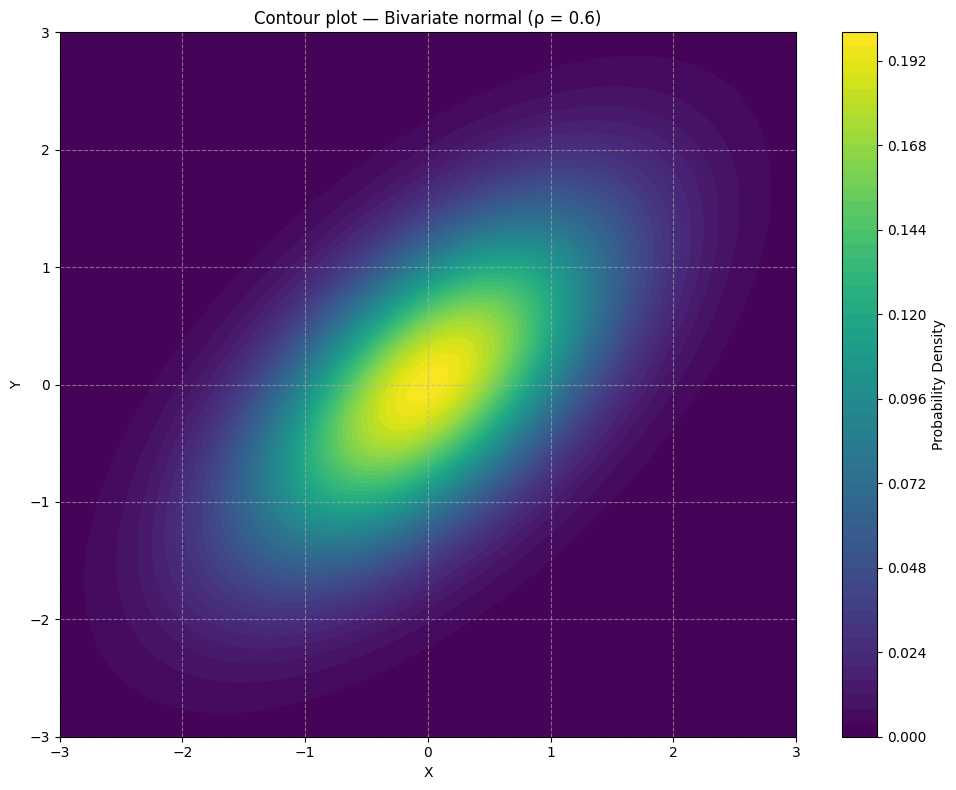

In [70]:
plt.figure(figsize=FIG_SIZE_2D)
plt.contourf(X, Y, Z, levels=50, cmap=CMAP)
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Contour plot — Bivariate normal (ρ = {rho})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

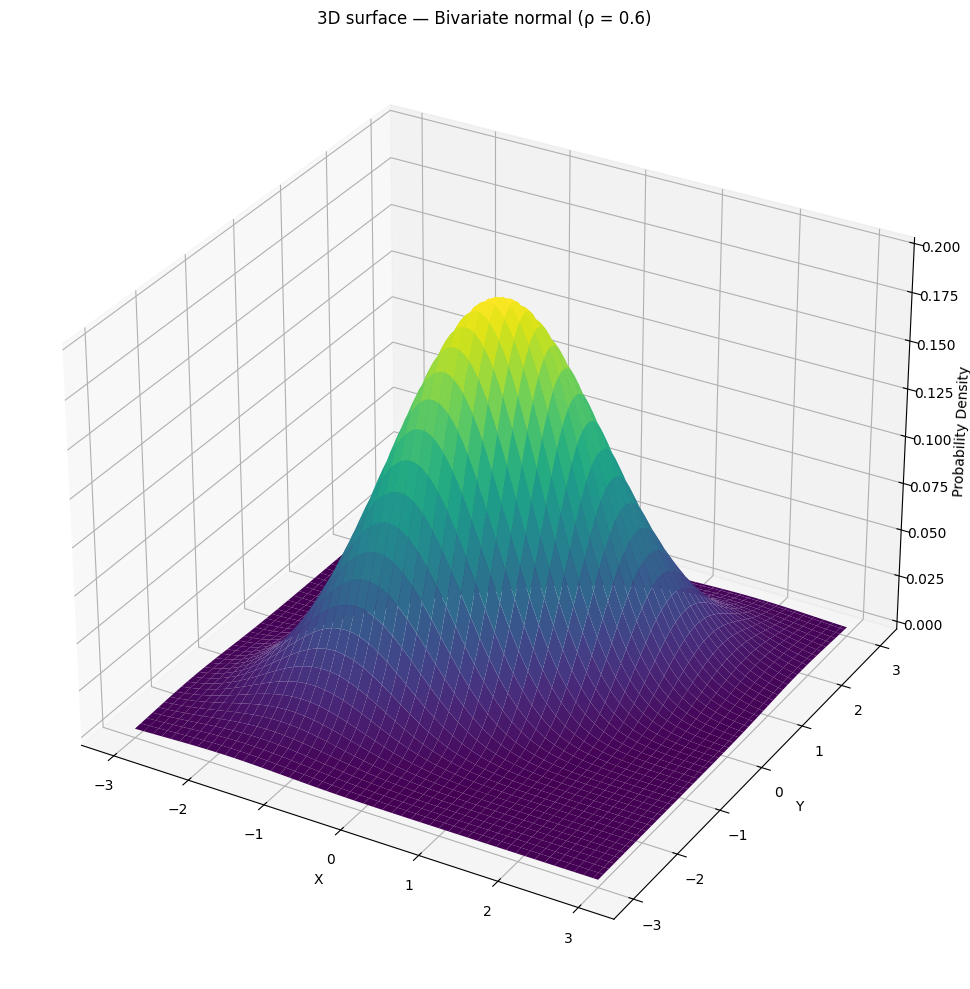

In [71]:
fig = plt.figure(figsize=FIG_SIZE_3D)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=CMAP)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title(f'3D surface — Bivariate normal (ρ = {rho})')
plt.tight_layout()
plt.show()

## 7. Simulated samples on the density

Samples from \(\mathcal{N}(\boldsymbol{\mu}, \Sigma)\) overlaid on the theoretical contour.

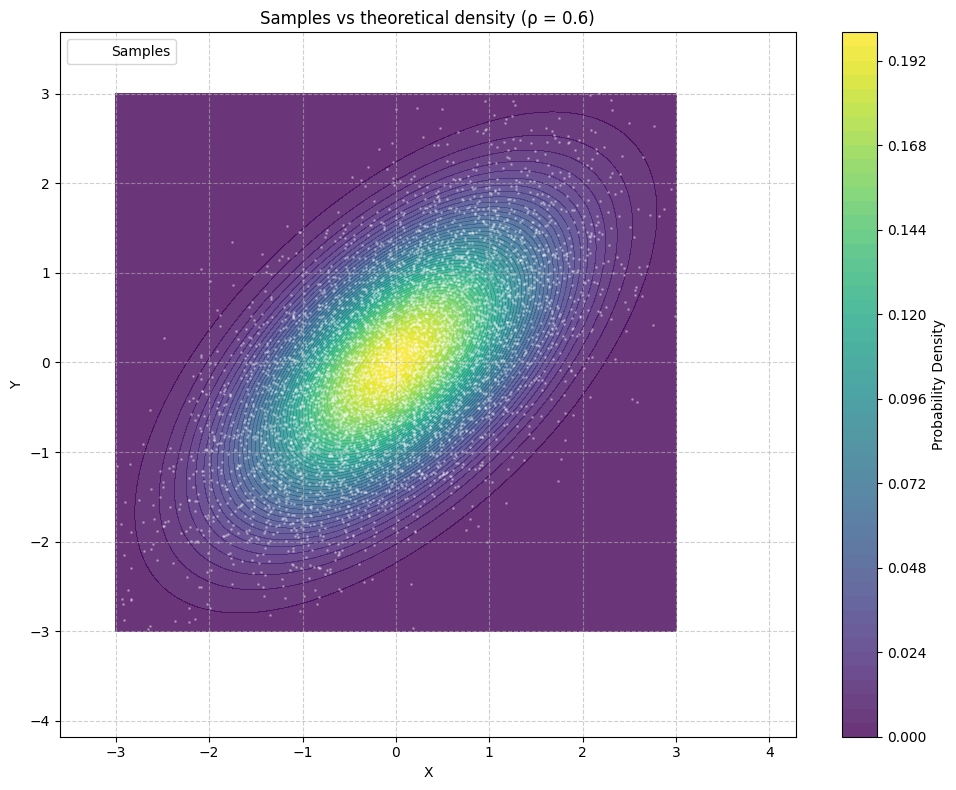

In [72]:
plt.figure(figsize=FIG_SIZE_2D)
plt.contourf(X, Y, Z, levels=50, cmap=CMAP, alpha=0.8)
plt.colorbar(label='Probability Density')
plt.scatter(X_sim, Y_sim, s=1, c='white', alpha=0.3, label='Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Samples vs theoretical density (ρ = {rho})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 8. Real-world dataset: stock log returns (sourced online)

We use a **relevant dataset sourced online**: [Yahoo Finance stock data](https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset) from Kaggle (AMZN and NVDA). Log returns are computed from scratch; mean, standard deviation, and covariance are also computed from scratch (no statistical libraries). We then compute the BVN PDF at each data point and visualize the fitted density.

In [73]:
import os
import pandas as pd
try:
    from IPython.display import display
except ImportError:
    display = print

try:
    import kagglehub
    path = kagglehub.dataset_download("iveeaten3223times/massive-yahoo-finance-dataset")
    print("Path to dataset files:", path)
    csv_path = os.path.join(path, 'stock_details_5_years.csv')
except Exception as e:
    print("Using local file (Kaggle unavailable):", e)
    csv_path = 'stock_details_5_years.csv'

df_stocks = pd.read_csv(csv_path)
df_stocks.head()

Using local file (Kaggle unavailable): No module named 'kagglehub'


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [74]:
# Filter AMZN and NVDA, sort by date
stock1 = df_stocks[df_stocks['Company'] == 'AMZN'].copy()
stock2 = df_stocks[df_stocks['Company'] == 'NVDA'].copy()
stock1 = stock1.sort_values('Date')
stock2 = stock2.sort_values('Date')

# Log returns from scratch: log(Close_t / Close_{t-1})
stock1['Log Returns'] = np.log(stock1['Close'] / stock1['Close'].shift(1))
stock2['Log Returns'] = np.log(stock2['Close'] / stock2['Close'].shift(1))

print("Log returns (first 3 rows):")
display(stock1[['Date', 'Close', 'Log Returns']].head(3))
display(stock2[['Date', 'Close', 'Log Returns']].head(3))

Log returns (first 3 rows):


,Date,Close,Log Returns
3,2018-11-29 00:00:00-05:00,83.678497,NaN
461,2018-11-30 00:00:00-05:00,84.508499,0.009870
919,2018-12-03 00:00:00-05:00,88.617996,0.047483


,Date,Close,Log Returns
4,2018-11-29 00:00:00-05:00,39.037853,NaN
462,2018-11-30 00:00:00-05:00,40.543697,0.037849
920,2018-12-03 00:00:00-05:00,42.183514,0.039649


In [75]:
# Mean and standard deviation from scratch (no statistical libraries)
amzn_clean = stock1['Log Returns'].dropna()
nvda_clean = stock2['Log Returns'].dropna()
n_amzn = len(amzn_clean)
n_nvda = len(nvda_clean)

mean_log_return_amzn = amzn_clean.sum() / n_amzn
squared_diff_amzn = (amzn_clean - mean_log_return_amzn)**2
std_log_return_amzn = np.sqrt(squared_diff_amzn.sum() / n_amzn)

mean_log_return_nvda = nvda_clean.sum() / n_nvda
squared_diff_nvda = (nvda_clean - mean_log_return_nvda)**2
std_log_return_nvda = np.sqrt(squared_diff_nvda.sum() / n_nvda)

print(f"AMZN: mean = {mean_log_return_amzn:.6f}, std = {std_log_return_amzn:.6f}")
print(f"NVDA: mean = {mean_log_return_nvda:.6f}, std = {std_log_return_nvda:.6f}")

AMZN: mean = 0.000445, std = 0.022617
NVDA: mean = 0.001997, std = 0.032683


In [76]:
# Merge on Date, then covariance from scratch
merged_stocks = pd.merge(stock1[['Date', 'Log Returns']], stock2[['Date', 'Log Returns']], on='Date', suffixes=('_AMZN', '_NVDA'))
merged_stocks_cleaned = merged_stocks.dropna()
n_merged = len(merged_stocks_cleaned)

covariance = ((merged_stocks_cleaned['Log Returns_AMZN'] - mean_log_return_amzn) * (merged_stocks_cleaned['Log Returns_NVDA'] - mean_log_return_nvda)).sum() / n_merged
rho_stocks = covariance / (std_log_return_amzn * std_log_return_nvda)

print(f"Covariance: {covariance:.10f}")
print(f"Correlation (ρ): {rho_stocks:.6f}")

Covariance: 0.0004543752
Correlation (ρ): 0.614690


In [77]:
# PDF at each real-world data point (our BVN formula from scratch)
X_data = merged_stocks_cleaned['Log Returns_AMZN'].values
Y_data = merged_stocks_cleaned['Log Returns_NVDA'].values

pdf_values_stocks = bivariate_normal_pdf(X_data, Y_data, mean_log_return_amzn, mean_log_return_nvda, std_log_return_amzn, std_log_return_nvda, rho_stocks)
merged_stocks_cleaned = merged_stocks_cleaned.copy()
merged_stocks_cleaned['PDF_Value'] = pdf_values_stocks

print("PDF at each data point (first 5):", pdf_values_stocks[:5])
display(merged_stocks_cleaned.head())

PDF at each data point (first 5): [141.79995036  30.99485087   4.20716175 184.45464966  19.43347048]


,Date,Log Returns_AMZN,Log Returns_NVDA,PDF_Value
1,2018-11-30 00:00:00-05:00,0.009870,0.037849,141.799950
2,2018-12-03 00:00:00-05:00,0.047483,0.039649,30.994851
3,2018-12-04 00:00:00-05:00,-0.060447,-0.079088,4.207162
4,2018-12-06 00:00:00-05:00,0.018287,0.007483,184.454650
5,2018-12-07 00:00:00-05:00,-0.042106,-0.069855,19.433470


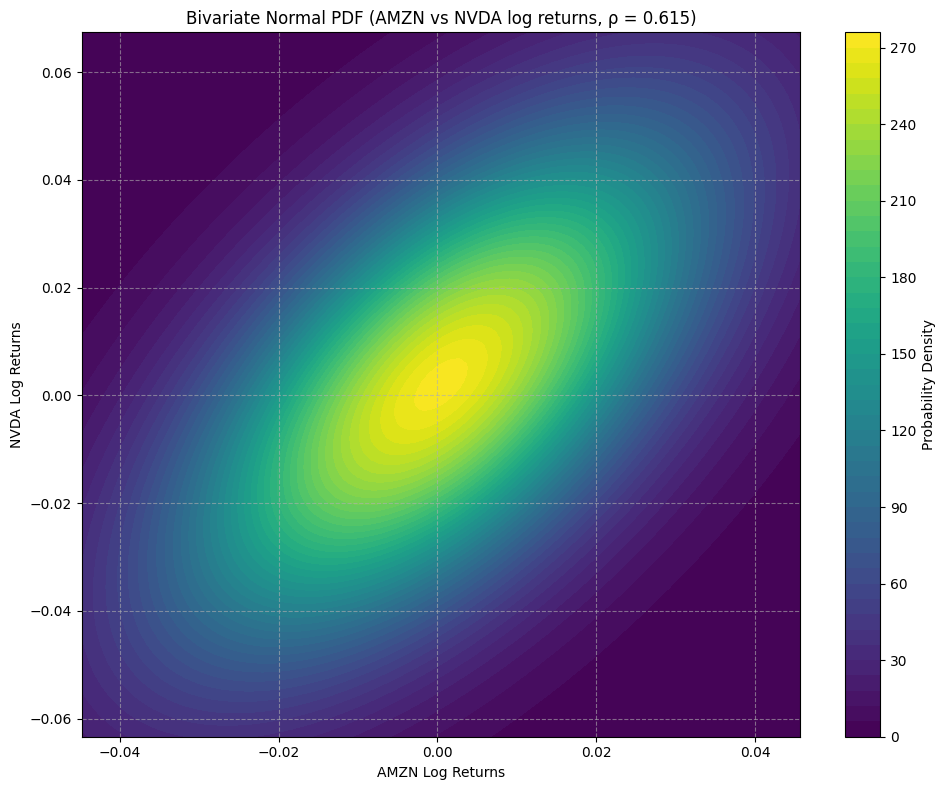

In [78]:
# Grid and contour for stock BVN fit
x_range_s = np.linspace(mean_log_return_amzn - 2*std_log_return_amzn, mean_log_return_amzn + 2*std_log_return_amzn, 100)
y_range_s = np.linspace(mean_log_return_nvda - 2*std_log_return_nvda, mean_log_return_nvda + 2*std_log_return_nvda, 100)
X_s, Y_s = np.meshgrid(x_range_s, y_range_s)
Z_s = bivariate_normal_pdf(X_s, Y_s, mean_log_return_amzn, mean_log_return_nvda, std_log_return_amzn, std_log_return_nvda, rho_stocks)

plt.figure(figsize=FIG_SIZE_2D)
plt.contourf(X_s, Y_s, Z_s, levels=50, cmap=CMAP)
plt.colorbar(label='Probability Density')
plt.xlabel('AMZN Log Returns')
plt.ylabel('NVDA Log Returns')
plt.title(f'Bivariate Normal PDF (AMZN vs NVDA log returns, ρ = {rho_stocks:.3f})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

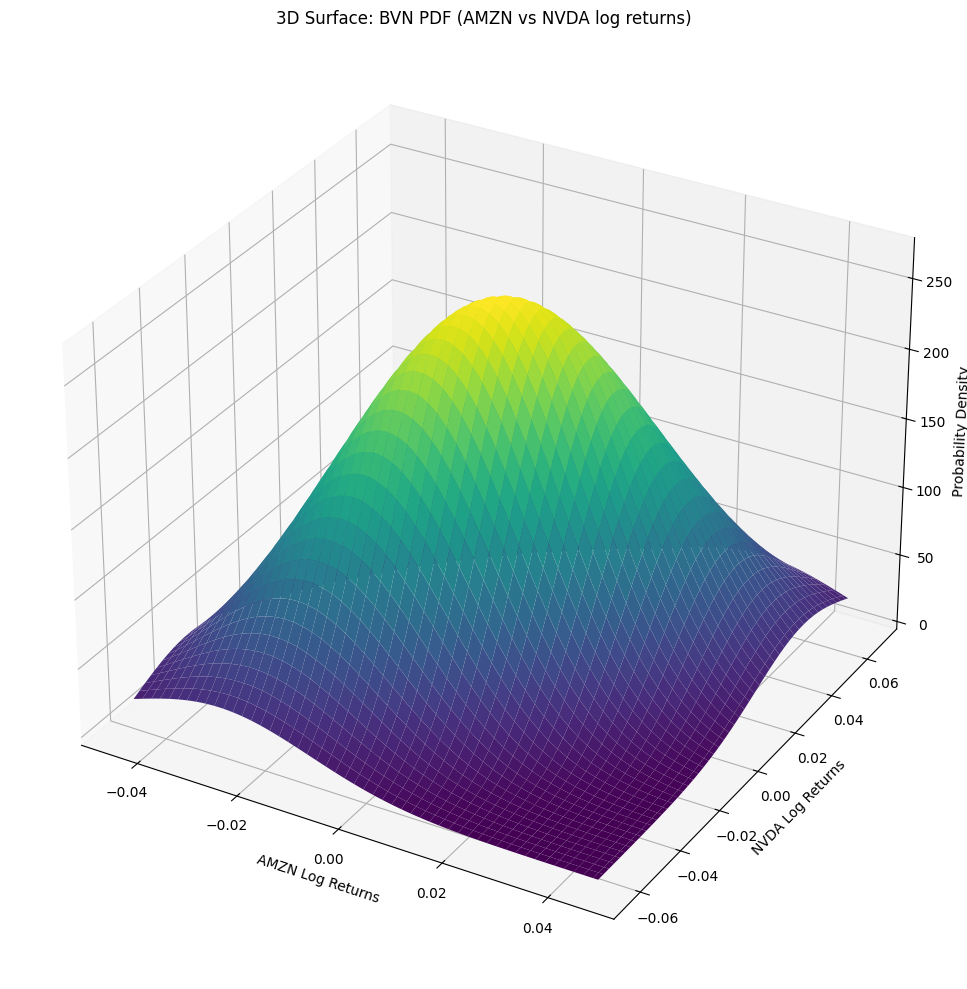

In [79]:
fig = plt.figure(figsize=FIG_SIZE_3D)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_s, Y_s, Z_s, cmap=CMAP)
ax.set_xlabel('AMZN Log Returns')
ax.set_ylabel('NVDA Log Returns')
ax.set_zlabel('Probability Density')
ax.set_title('3D Surface: BVN PDF (AMZN vs NVDA log returns)')
plt.tight_layout()
plt.show()